In [1]:
from Analyser import *
import Main

In [2]:
modelName = 'SymTree_Variance'

In [3]:
# Some PyABC magic to get our set of parameters
from pyabc import (ABCSMC, Distribution, RV, MultivariateNormalTransition)
import scipy as sp
import scipy.stats as st
import tempfile
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def model(params):
    return Main.generate_and_analyse(modelName,params)

In [5]:
metrics = {
    'default_w':       (0.2, 1.5),
    'default_decay':   (0.4, 1.0),
    'default_slash':   (0, 90),
    'default_slashr':  (0, 50),
    'default_plus':    (0, 180),
    'default_plusr':   (0, 50),
    'default_d':       (0.5, 1.0),
    'rule_1_0': (0,1),
    'rule_1_1': (0,1)
}

In [1]:
prior = Distribution(default_slash   =RV("uniform", 0, 90), 
                     default_slashr =RV("uniform", 0, 50),
                     default_plus    =RV("uniform", 0, 180),
                     default_plusr  =RV("uniform", 0, 50),
                     default_decay   =RV("uniform", 0.4, 1.0),
                     default_w       =RV("uniform", 0.2, 1.5),
                     default_d       =RV("uniform", 0.5, 1.0),
                     rule_1_0 = RV("uniform", 0,1),
                     rule_1_1 = RV("uniform", 0,1)
                    )

SyntaxError: keyword argument repeated (<ipython-input-1-a138f85a57c8>, line 9)

In [7]:
abc = ABCSMC(model, prior, distance)

In [8]:
db_path = ("sqlite:///" + os.path.join(tempfile.gettempdir(), "test.db"))

In [9]:
target = model({})

In [10]:
abc.new(db_path, target)

INFO:History:Start <ABCSMC(id=49, start_time=2019-04-17 09:48:55.115508, end_time=None)>
INFO:Epsilon:initial epsilon is 20.28937606307288


49

In [11]:
history = abc.run(minimum_epsilon=1.0, max_nr_populations=10)

INFO:ABC:t:0 eps:20.28937606307288
INFO:ABC:t:1 eps:12.25389343371768
INFO:ABC:t:2 eps:9.977417338372295
INFO:ABC:t:3 eps:7.976385332256357
INFO:ABC:t:4 eps:7.058248617917923
INFO:ABC:t:5 eps:5.953025838561608
INFO:ABC:t:6 eps:5.613729509827388
INFO:ABC:t:7 eps:5.129225458056432
INFO:ABC:t:8 eps:4.924142476009905
INFO:ABC:t:9 eps:4.529670622646143
INFO:History:Done <ABCSMC(id=49, start_time=2019-04-17 09:48:55.115508, end_time=2019-04-17 10:28:15.730363)>


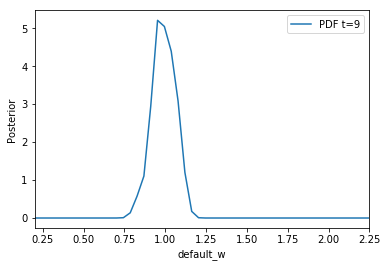

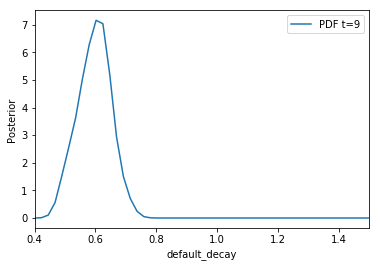

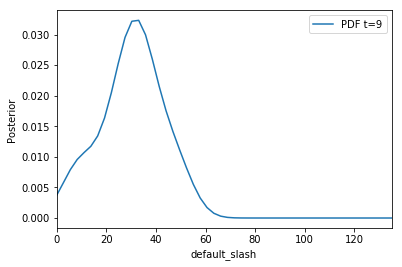

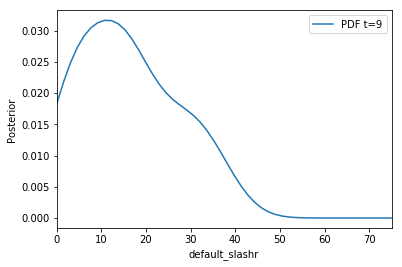

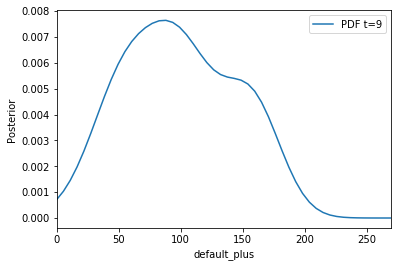

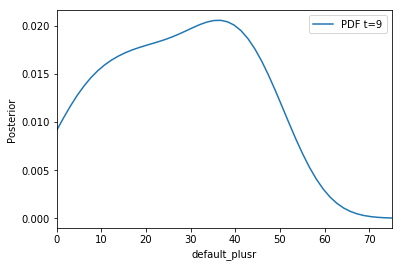

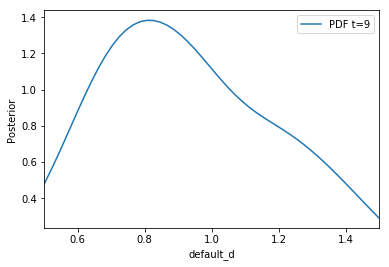

In [17]:
# Visualise results
from pyabc.visualization import plot_kde_1d
for (k,v) in metrics.items():
    fig, ax = plt.subplots()
    for t in range(history.max_t, history.max_t+1):
        df, w = history.get_distribution(m=0, t=t)
        plot_kde_1d(df, w,
                    xmin=v[0], xmax=1.5*v[1],
                    x=k, ax=ax,
                    label="PDF t={}".format(t))
    ax.legend();
    fig.savefig('../../../../Report/images/'+modelName+'/'+k)